## Predicting NBA players' scoring average in Regular Season and Playoffs using Machine Learning.
In this notebook, I am going to go through an example machine learning project with the goal of predicting the scoring average of players

Problem definition How well can we predict the scoring of each player given its characteristics and categories provided by Kaggle.

Data The data was adapted from that of Data from Basketball Reference. https://www.kaggle.com/datasets/vivovinco/nba-player-stats

There is 2 dataset:

2021-2022 NBA Player Stats Regular Season CSV 2021-2022 NBA Player Stats Playoff CSV

Evaluation The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted the scoring Per Average.

For more on the evaluation of this project check: https://www.kaggle.com/datasets/vivovinco/nba-player-stats

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

Features

* Rk : Rank
* Player : Player's name
* Pos : Position
* Age : Player's age
* Tm : Team
* G : Games played
* GS : Games started
* MP : Minutes played per game
* FG : Field goals per game
* FGA : Field goal attempts per game
* FG% : Field goal percentage
* 3P : 3-point field goals per game
* 3PA : 3-point field goal attempts per game
* 3P% : 3-point field goal percentage
* 2P : 2-point field goals per game
* 2PA : 2-point field goal attempts per game
* 2P% : 2-point field goal percentage
* eFG% : Effective field goal percentage
* FT : Free throws per game
* FTA : Free throw attempts per game
* FT% : Free throw percentage
* ORB : Offensive rebounds per game
* DRB : Defensive rebounds per game
* TRB : Total rebounds per game
* AST : Assists per game
* STL : Steals per game
* BLK : Blocks per game
* TOV : Turnovers per game
* PF : Personal fouls per game
* PTS : Points per game

In [53]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Specify the encoding parameter when reading the CSV file
df = pd.read_csv("2021_2022_NBA_PlayerStats_Regular.csv", encoding='latin1', sep=";")

In [142]:
# Specify the encoding parameter when reading the CSV file
dfplayoff = pd.read_csv("2021_2022_NBA_PlayerStats_Playoffs.csv", encoding='latin1', sep=";")

In [56]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [143]:
dfplayoff

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4
2,3,Bam Adebayo,C,24,MIA,18,18,34.1,5.8,9.7,...,0.763,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8
3,4,Nickeil Alexander-Walker,SG,23,UTA,1,0,5.0,2.0,2.0,...,1.000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
4,5,Grayson Allen,SG,26,MIL,12,5,25.4,3.1,6.8,...,0.636,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,213,Ziaire Williams,SF,20,MEM,10,1,16.8,2.3,5.2,...,0.923,0.4,1.2,1.6,0.5,0.5,0.0,0.2,1.4,6.9
213,214,Delon Wright,SG,29,ATL,5,0,27.4,3.0,5.8,...,0.667,2.2,2.6,4.8,2.8,0.8,0.2,1.0,0.4,8.2
214,215,Thaddeus Young,PF,33,TOR,6,0,14.5,1.5,3.0,...,0.250,1.2,1.8,3.0,1.7,0.8,0.2,0.5,1.3,3.3
215,216,Trae Young,PG,23,ATL,5,5,37.2,4.4,13.8,...,0.788,1.0,4.0,5.0,6.0,0.6,0.0,6.2,2.6,15.4


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      812 non-null    int64  
 1   Player  812 non-null    object 
 2   Pos     812 non-null    object 
 3   Age     812 non-null    int64  
 4   Tm      812 non-null    object 
 5   G       812 non-null    int64  
 6   GS      812 non-null    int64  
 7   MP      812 non-null    float64
 8   FG      812 non-null    float64
 9   FGA     812 non-null    float64
 10  FG%     812 non-null    float64
 11  3P      812 non-null    float64
 12  3PA     812 non-null    float64
 13  3P%     812 non-null    float64
 14  2P      812 non-null    float64
 15  2PA     812 non-null    float64
 16  2P%     812 non-null    float64
 17  eFG%    812 non-null    float64
 18  FT      812 non-null    float64
 19  FTA     812 non-null    float64
 20  FT%     812 non-null    float64
 21  ORB     812 non-null    float64
 22  DR

In [59]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


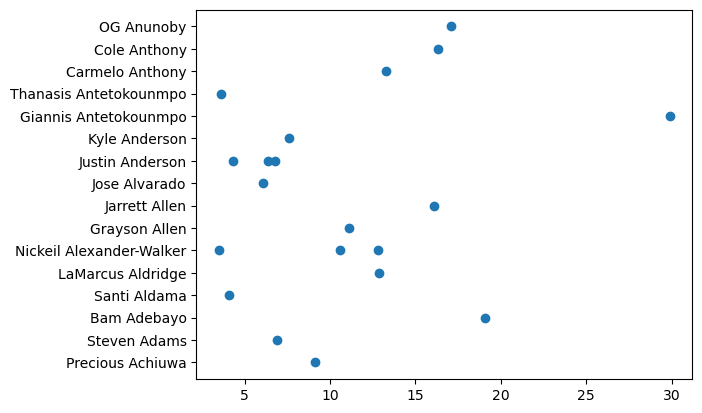

In [60]:
fig, ax = plt.subplots()
ax.scatter(df["PTS"][:20], df["Player"][:20])

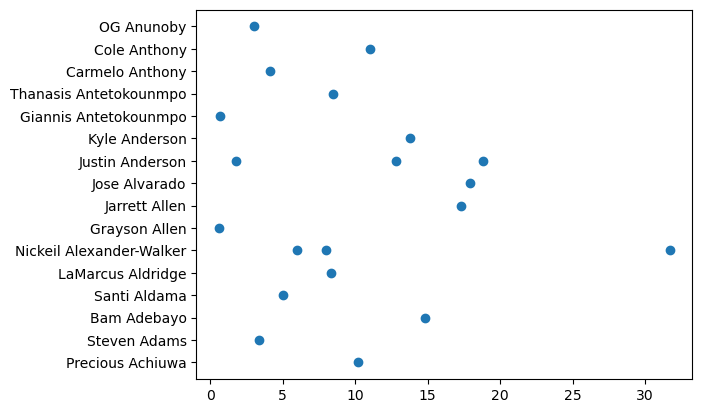

In [61]:
fig, ax = plt.subplots()
ax.scatter(df2["PTS"][:20], df["Player"][:20])

<Axes: ylabel='Frequency'>

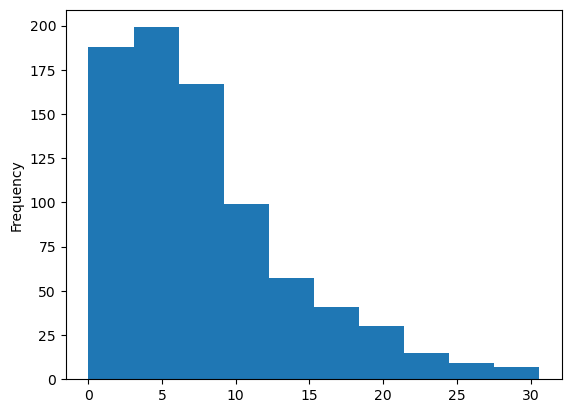

In [62]:
df.PTS.plot.hist()

<Axes: ylabel='Frequency'>

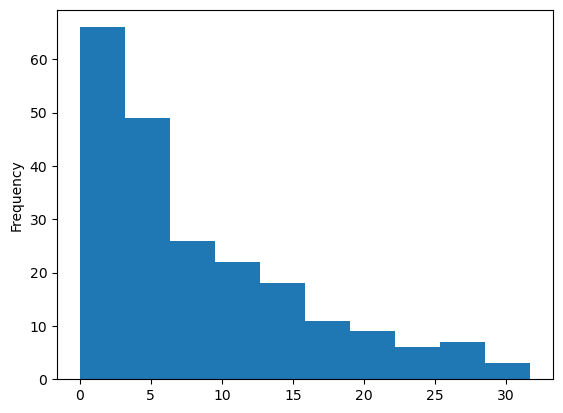

In [144]:
dfplayoff.PTS.plot.hist()

In [63]:
df.corr(numeric_only=True)

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,1.000000,-0.037216,-0.066503,-0.086550,-0.050971,-0.057393,-0.054080,-0.001554,-0.052654,-0.052840,...,-0.017262,-0.030168,-0.079571,-0.070434,0.006615,-0.015441,-0.017137,-0.020534,0.000567,-0.057467
Age,-0.037216,1.000000,0.042212,0.052232,0.145388,0.087947,0.085564,0.059665,0.121144,0.104885,...,0.075038,0.014226,0.124140,0.099501,0.171731,0.072693,0.038176,0.096063,0.127838,0.094685
G,-0.066503,0.042212,1.000000,0.680436,0.620290,0.563977,0.542432,0.311718,0.475981,0.457740,...,0.468275,0.293125,0.517411,0.487806,0.387040,0.424368,0.336577,0.424739,0.470319,0.559330
GS,-0.086550,0.052232,0.680436,1.000000,0.751435,0.736394,0.713715,0.226771,0.530903,0.524531,...,0.288935,0.354654,0.656365,0.612579,0.563921,0.521898,0.408970,0.617675,0.538844,0.732292
MP,-0.050971,0.145388,0.620290,0.751435,1.000000,0.886895,0.898603,0.299632,0.720450,0.732635,...,0.496879,0.357061,0.756131,0.688470,0.728131,0.717810,0.447035,0.771405,0.743587,0.887411
FG,-0.057393,0.087947,0.563977,0.736394,0.886895,1.000000,0.970853,0.355639,0.679117,0.680076,...,0.425511,0.383116,0.764754,0.703036,0.707715,0.617590,0.447414,0.811092,0.651883,0.989932
FGA,-0.054080,0.085564,0.542432,0.713715,0.898603,0.970853,1.000000,0.211332,0.764839,0.794470,...,0.437638,0.257649,0.697697,0.612265,0.744193,0.637838,0.358791,0.824847,0.616042,0.975918
FG%,-0.001554,0.059665,0.311718,0.226771,0.299632,0.355639,0.211332,1.000000,0.053493,-0.018902,...,0.260330,0.436072,0.372291,0.421290,0.109928,0.171141,0.387849,0.199539,0.395070,0.313305
3P,-0.052654,0.121144,0.475981,0.530903,0.720450,0.679117,0.764839,0.053493,1.000000,0.969827,...,0.436182,-0.115142,0.359467,0.237293,0.539793,0.506564,0.092254,0.540044,0.381334,0.729547
3PA,-0.052840,0.104885,0.457740,0.524531,0.732635,0.680076,0.794470,-0.018902,0.969827,1.000000,...,0.415277,-0.127942,0.369933,0.241032,0.564140,0.518342,0.087548,0.572415,0.386590,0.728704


In [87]:
df.PTS.head(30)

0      9.1
1      6.9
2     19.1
3      4.1
4     12.9
5     10.6
6     12.8
7      3.5
8     11.1
9     16.1
10     6.1
11     6.4
12     4.3
13     6.8
14     7.6
15    29.9
16     3.6
17    13.3
18    16.3
19    17.1
20     1.6
21     4.0
22     5.3
23     5.4
24     5.3
25     8.4
26     0.3
27    17.2
28     4.7
29    11.3
Name: PTS, dtype: float64

In [66]:
# Check the different values of different columns
df_tmp.PTS.value_counts()

0.0     35
2.0     21
6.2     12
1.0     12
3.0     11
        ..
16.8     1
30.3     1
27.1     1
9.5      1
17.9     1
Name: PTS, Length: 213, dtype: int64

## Make a copy of the original DataFrame
Since I am going to be manipulating the data, I'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [67]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [68]:
# Check the different values of different columns
df_tmp.AST.value_counts()

0.0     63
1.0     51
0.5     49
0.3     41
0.6     38
        ..
6.8      1
7.4      1
10.5     1
10.2     1
9.7      1
Name: AST, Length: 82, dtype: int64

## 5. Modelling
Knowing the evaluation metric I am heading towards. I could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what I'll do instead is use a machine learning model to help me do EDA.

Following the https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html learning map, we find a https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor might be a good candidate.

In [69]:
# Check for missing categories and different datatypes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      812 non-null    int64  
 1   Player  812 non-null    object 
 2   Pos     812 non-null    object 
 3   Age     812 non-null    int64  
 4   Tm      812 non-null    object 
 5   G       812 non-null    int64  
 6   GS      812 non-null    int64  
 7   MP      812 non-null    float64
 8   FG      812 non-null    float64
 9   FGA     812 non-null    float64
 10  FG%     812 non-null    float64
 11  3P      812 non-null    float64
 12  3PA     812 non-null    float64
 13  3P%     812 non-null    float64
 14  2P      812 non-null    float64
 15  2PA     812 non-null    float64
 16  2P%     812 non-null    float64
 17  eFG%    812 non-null    float64
 18  FT      812 non-null    float64
 19  FTA     812 non-null    float64
 20  FT%     812 non-null    float64
 21  ORB     812 non-null    float64
 22  DR

In [70]:
# Check for missing values
df_tmp.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

## Convert strings to categories
One way to help turn all of the data into numbers is to convert the columns with the string datatype into a category datatype.

To do this I can use the pandas types API which allows me to interact and manipulate the types of data.

In [99]:
df_tmp.tail().T

,807,808,809,810,811
Rk,601,602,603,604,605
Player,541,554,457,95,236
Pos,3,5,1,1,1
Age,33,23,23,29,24
Tm,28,1,16,25,13
G,26,76,56,27,76
GS,0,76,12,0,76
MP,18.3,34.9,12.6,13.1,24.4
FG,2.6,9.4,2.3,1.9,4.1
FGA,5.5,20.3,4.4,3.3,6.5


In [72]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Player
Pos
Tm


In [74]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [82]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [83]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 812 non-null    int64  
 1   Player             812 non-null    int16  
 2   Pos                812 non-null    int8   
 3   Age                812 non-null    int64  
 4   Tm                 812 non-null    int8   
 5   G                  812 non-null    int64  
 6   GS                 812 non-null    int64  
 7   MP                 812 non-null    float64
 8   FG                 812 non-null    float64
 9   FGA                812 non-null    float64
 10  FG%                812 non-null    float64
 11  3P                 812 non-null    float64
 12  3PA                812 non-null    float64
 13  3P%                812 non-null    float64
 14  2P                 812 non-null    float64
 15  2PA                812 non-null    float64
 16  2P%                812 non

In [85]:
df_tmp.isnull().sum()/len(df_tmp)

Rk                   0.0
Player               0.0
Pos                  0.0
Age                  0.0
Tm                   0.0
G                    0.0
GS                   0.0
MP                   0.0
FG                   0.0
FGA                  0.0
FG%                  0.0
3P                   0.0
3PA                  0.0
3P%                  0.0
2P                   0.0
2PA                  0.0
2P%                  0.0
eFG%                 0.0
FT                   0.0
FTA                  0.0
FT%                  0.0
ORB                  0.0
DRB                  0.0
TRB                  0.0
AST                  0.0
STL                  0.0
BLK                  0.0
TOV                  0.0
PF                   0.0
PTS                  0.0
Player_is_missing    0.0
Pos_is_missing       0.0
Tm_is_missing        0.0
dtype: float64

In [88]:
# Save preprocessed data
df_tmp.to_csv("NBA_data_train_tmp.csv",
              index=False)

In [90]:
# Import preprocessed data
df_tmp = pd.read_csv("NBA_data_train_tmp.csv",
                     low_memory=False)
df_tmp.tail().T

,807,808,809,810,811
Rk,601,602,603,604,605
Player,541,554,457,95,236
Pos,3,5,1,1,1
Age,33,23,23,29,24
Tm,28,1,16,25,13
G,26,76,56,27,76
GS,0,76,12,0,76
MP,18.3,34.9,12.6,13.1,24.4
FG,2.6,9.4,2.3,1.9,4.1
FGA,5.5,20.3,4.4,3.3,6.5


## The processed DataFrame has the columns I added to it but it's still missing values.

In [92]:
# Check missing values
df_tmp.isna().sum()

Rk                   0
Player               0
Pos                  0
Age                  0
Tm                   0
G                    0
GS                   0
MP                   0
FG                   0
FGA                  0
FG%                  0
3P                   0
3PA                  0
3P%                  0
2P                   0
2PA                  0
2P%                  0
eFG%                 0
FT                   0
FTA                  0
FT%                  0
ORB                  0
DRB                  0
TRB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
Player_is_missing    0
Pos_is_missing       0
Tm_is_missing        0
dtype: int64

In [93]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Rk
Player
Pos
Age
Tm
G
GS
MP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
eFG%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
Player_is_missing
Pos_is_missing
Tm_is_missing


In [94]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [96]:
print(df_tmp.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player_is_missing', 'Pos_is_missing', 'Tm_is_missing'],
      dtype='object')


In [97]:
df_tmp

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Player_is_missing,Pos_is_missing,Tm_is_missing
0,1,476,1,22,28,73,28,23.6,3.6,8.3,...,6.5,1.1,0.5,0.6,1.2,2.1,9.1,False,False,False
1,2,529,1,28,15,76,75,26.3,2.8,5.1,...,10.0,3.4,0.9,0.8,1.5,2.0,6.9,False,False,False
2,3,35,1,24,16,56,56,32.6,7.3,13.0,...,10.1,3.4,1.4,0.8,2.6,3.1,19.1,False,False,False
3,4,510,3,21,15,32,0,11.3,1.7,4.1,...,2.7,0.7,0.2,0.3,0.5,1.1,4.1,False,False,False
4,5,367,1,36,3,47,12,22.3,5.4,9.7,...,5.5,0.9,0.3,1.0,0.9,1.7,12.9,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,541,3,33,28,26,0,18.3,2.6,5.5,...,4.4,1.7,1.2,0.4,0.8,1.7,6.3,False,False,False
808,602,554,5,23,1,76,76,34.9,9.4,20.3,...,3.7,9.7,0.9,0.1,4.0,1.7,28.4,False,False,False
809,603,457,1,23,16,56,12,12.6,2.3,4.4,...,5.3,0.9,0.3,0.4,0.7,1.5,5.3,False,False,False
810,604,95,1,29,25,27,0,13.1,1.9,3.3,...,4.6,0.8,0.3,0.2,0.7,2.1,5.2,False,False,False


In [100]:
df_tmp.isna().sum()

Rk                   0
Player               0
Pos                  0
Age                  0
Tm                   0
G                    0
GS                   0
MP                   0
FG                   0
FGA                  0
FG%                  0
3P                   0
3PA                  0
3P%                  0
2P                   0
2PA                  0
2P%                  0
eFG%                 0
FT                   0
FTA                  0
FT%                  0
ORB                  0
DRB                  0
TRB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
Player_is_missing    0
Pos_is_missing       0
Tm_is_missing        0
dtype: int64

The data is numeric and there are no missing values, I should be able to build a machine learning model.

Let's reinstantiate the RandomForestRegressor.

This will take a few minutes which is too long for interacting with it. So what I'll do is create a subset of rows to work with.

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(df_tmp.drop("PTS", axis=1), df_tmp.PTS)

CPU times: user 802 ms, sys: 69.7 ms, total: 872 ms
Wall time: 250 ms


RandomForestRegressor(n_jobs=-1)

In [103]:
# Score the model
model.score(df_tmp.drop("PTS", axis=1), df_tmp.PTS)

0.9987240035443553

## Splitting data into train/valid/test sets

In [104]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_tmp.drop("PTS", axis=1), df_tmp["PTS"], test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verify the shape of the training, validation, and test sets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)

X_train shape: (519, 32)
X_valid shape: (130, 32)
X_test shape: (163, 32)


## Building an evaluation function
Will attempt to use root mean squared long error (RMSLE)

RMSLE = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. MAE (mean absolute error) is more about exact differences.

It's important to understand the evaluation metric I am going for.

Since Scikit-Learn doesn't have a function built-in for RMSLE, I'll create our own.

Doing this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

I'll also calculate the MAE and R^2.

In [105]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)
Retraining an entire model would take far too long to continuing experimenting as fast as I want to.

So what I'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

In [106]:
len(X_train)

519

### Let's alter the number of samples each n_estimator in the RandomForestRegressor see's using the max_samples parameter.


In [107]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=200)

In [109]:
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=200, n_jobs=-1)

In [111]:
show_scores(model)

{'Training MAE': 0.3102042389210015,
 'Valid MAE': 0.5150692307692306,
 'Training RMSLE': 0.061302698001510204,
 'Valid RMSLE': 0.08626890899142625,
 'Training R^2': 0.9925729307961062,
 'Valid R^2': 0.9822228211346324}

### Hyperparameter tuning with RandomizedSearchCV
Will increase n_iter to try more combinations of hyperparameters but in our case.

Trying to reduce the amount of time it takes between experiments.



In [113]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [200]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/heic/Desktop/Data_projects/NBA_Scoring/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/heic/Desktop/Data_projects/NBA_Scoring/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/heic/Desktop/Data_projects/NBA_Scoring/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, 

/Users/heic/Desktop/Data_projects/NBA_Scoring/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/heic/Desktop/Data_projects/NBA_Scoring/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/heic/Desktop/Data_projects/NBA_Scoring/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, 

CPU times: user 3.6 s, sys: 90.3 ms, total: 3.69 s
Wall time: 3.72 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [200],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [114]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': 200,
 'max_features': 'sqrt',
 'max_depth': None}

In [115]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 0.4530348576401427,
 'Valid MAE': 0.7354896932432642,
 'Training RMSLE': 0.10728309668262134,
 'Valid RMSLE': 0.14851231456534145,
 'Training R^2': 0.985479954354818,
 'Valid R^2': 0.966294316029166}

## Train a model with the best parameters
In a model I prepared earlier, I tried 100 different combinations of hyperparameters (setting n_iter to 100 in RandomizedSearchCV) and found the best results came from the ones you see below.

I'll instantiate a new model with these discovered hyperparameters and reset the max_samples back to its original value.

In [116]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=70,
                                    min_samples_leaf=3,
                                    min_samples_split=2,
                                    max_features=1,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: user 59.4 ms, sys: 73.6 ms, total: 133 ms
Wall time: 76.1 ms


RandomForestRegressor(max_features=1, min_samples_leaf=3, n_estimators=70,
                      n_jobs=-1)

In [117]:
show_scores(ideal_model)

{'Training MAE': 0.6327443305405464,
 'Valid MAE': 1.1495318979834661,
 'Training RMSLE': 0.15370721374965324,
 'Valid RMSLE': 0.20879993801199817,
 'Training R^2': 0.9712169174496366,
 'Valid R^2': 0.9166781607158804}

With these new hyperparameters as well as using all the samples, I can see an improvement to our models performance.

Faster model by altering some of the hyperparameters, particularly by lowering n_estimators since each increase in n_estimators is basically building another small model.

However, lowering of n_estimators or altering of other hyperparameters may lead to poorer results.

In [118]:
%%time
# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(X_train, y_train)

CPU times: user 106 ms, sys: 31.8 ms, total: 138 ms
Wall time: 53.4 ms


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [119]:
show_scores(fast_model)

{'Training MAE': 0.19998062389066726,
 'Valid MAE': 0.49413950488613917,
 'Training RMSLE': 0.045667771354124836,
 'Valid RMSLE': 0.09669597439825718,
 'Training R^2': 0.9967255785880823,
 'Valid R^2': 0.9833993292504409}

Make predictions on test data
Now I've got a trained model, it's time to make predictions on the test data.

In [120]:
X_test.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,Player_is_missing,Pos_is_missing,Tm_is_missing
247,185,398,9,23,16,12,0,10.7,0.4,1.8,...,1.2,1.9,0.6,0.4,0.3,0.2,1.3,False,False,False
575,431,114,1,22,28,3,0,9.0,1.0,2.0,...,1.3,1.7,0.0,0.0,0.7,0.0,0.3,False,False,False
227,172,12,7,24,22,5,0,14.8,1.2,4.0,...,2.6,3.0,0.4,0.2,0.0,0.8,1.4,False,False,False
290,222,200,9,27,22,61,30,28.4,3.9,9.1,...,1.4,2.0,1.8,1.0,0.1,1.0,1.8,False,False,False
538,398,7,9,24,26,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False


In [121]:
X_train.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,Player_is_missing,Pos_is_missing,Tm_is_missing
521,386,215,1,31,17,5,0,14.0,2.2,4.4,...,2.0,4.2,0.4,0.6,0.4,0.6,1.4,False,False,False
196,152,122,5,22,3,22,7,15.5,1.8,4.9,...,1.7,3.0,0.8,0.6,0.3,0.4,1.6,False,False,False
673,505,602,5,24,21,4,4,43.5,4.8,13.0,...,4.8,5.3,7.5,1.3,1.0,2.5,3.8,False,False,False
390,289,573,5,29,27,3,0,17.7,0.7,3.3,...,1.3,2.0,1.7,0.7,0.7,0.3,1.0,False,False,False
379,282,123,9,20,28,2,0,1.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False


In [123]:
# Let's see how the model goes predicting on the test data
model.predict(X_test)

array([1.2860e+00, 2.6520e+00, 3.3780e+00, 1.1055e+01, 2.0000e-02,
       8.4800e-01, 2.5629e+01, 1.5945e+01, 6.2000e-02, 1.1961e+01,
       1.7134e+01, 1.5126e+01, 5.0060e+00, 2.4995e+01, 1.2600e-01,
       2.1640e+00, 6.3790e+00, 4.2640e+00, 1.7069e+01, 1.5293e+01,
       9.4520e+00, 2.8910e+00, 7.2280e+00, 2.4957e+01, 1.6470e+01,
       9.7360e+00, 6.0370e+00, 2.5530e+00, 9.1900e+00, 1.9998e+01,
       1.4273e+01, 1.9166e+01, 1.7398e+01, 6.0840e+00, 2.2660e+00,
       4.4070e+00, 7.0740e+00, 5.6000e+00, 1.0383e+01, 8.7310e+00,
       1.4789e+01, 1.2555e+01, 1.4565e+01, 2.0330e+00, 5.5600e+00,
       8.1830e+00, 7.1700e-01, 1.0640e+00, 4.1800e+00, 1.1529e+01,
       4.2130e+00, 9.5840e+00, 1.0301e+01, 2.0767e+01, 1.5588e+01,
       4.9450e+00, 7.7780e+00, 1.4180e+00, 4.1770e+00, 4.2270e+00,
       8.5430e+00, 1.2920e+00, 6.9350e+00, 1.4350e+01, 1.7583e+01,
       4.7090e+00, 4.9330e+00, 1.1816e+01, 6.5820e+00, 1.9348e+01,
       2.3350e+00, 9.2580e+00, 1.2880e+00, 6.6660e+00, 1.2762e

In [124]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(X_test)

In [126]:
test_preds

array([ 2.24071386,  3.33169482,  3.4502194 , 11.03704066,  0.3479151 ,
        1.62458909, 20.82936967, 16.12114956,  0.45866693, 10.49986203,
       14.94299603,  8.99929922,  4.63642027, 19.2808677 ,  0.53775426,
        2.54788912,  6.84321614,  6.5047483 , 16.86730787, 14.77399794,
        9.46511876,  2.59431603,  6.53938899, 20.12962698, 16.11658308,
        8.95867017,  7.33013265,  2.65392756,  6.54648686, 18.15537028,
       14.01054355, 17.66566842, 13.86171949,  6.8474967 ,  2.61240924,
        5.81016765,  6.66874392,  6.21262039,  9.9271141 , 10.46237691,
       14.01523227, 11.87641917, 15.58267254,  2.13838961,  5.82977568,
        8.55824706,  1.57848724,  1.44485182,  4.65914363,  8.08592352,
        5.15153566,  9.46483411,  9.7214674 , 15.69089399, 16.41989229,
        5.25689314,  7.5019089 ,  2.1957543 ,  4.2729873 ,  4.17683681,
        8.73711709,  1.87585007,  9.26861595, 13.61543537, 16.91527469,
        4.92532349,  5.5342149 ,  9.51626219,  6.12136008, 17.53

In [127]:
len(test_preds)

163

In [128]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["Player"] = X_test["Player"]
df_preds["PTS"] = test_preds
df_preds

,Player,PTS
247,398,2.240714
575,114,3.331695
227,12,3.450219
290,200,11.037041
538,7,0.347915
...,...,...
675,138,1.909807
439,497,4.455721
756,340,11.064235
517,395,12.662351


In [129]:
# Export prediction data
df_preds.to_csv("NBA_Scoring_predictions.csv", index=False)

### Find feature importance of our best model

In [130]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([0.00740003, 0.00622525, 0.00556741, 0.00542025, 0.00464415,
       0.0414376 , 0.04789664, 0.04590728, 0.09326102, 0.08797485,
       0.01990145, 0.0763027 , 0.04789287, 0.02210615, 0.05660429,
       0.05286476, 0.01850872, 0.02028948, 0.02833483, 0.03760531,
       0.02695304, 0.01883324, 0.03659388, 0.02177069, 0.03970416,
       0.0426677 , 0.02155248, 0.02731998, 0.03845978, 0.        ,
       0.        , 0.        ])

In [131]:
!pip install seaborn

import seaborn as sns
import sys
!conda install --yes --prefix {sys.prefix} seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Solving environment: done

## Package Plan ##

  environment location: /Users/heic/Desktop/Data_projects/NBA_Scoring/env

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-arm64::seaborn-0.12.2-py311hca03da5_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [132]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

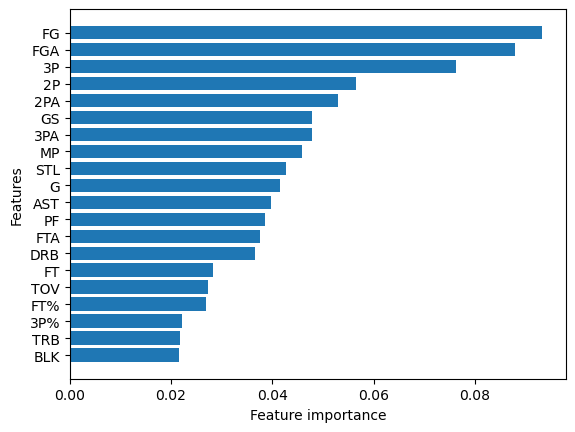

In [133]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [134]:
sum(ideal_model.feature_importances_)

1.0

In [138]:
df.FG.value_counts()

0.0     42
1.0     33
1.3     28
3.0     21
1.4     20
        ..
8.0      1
9.8      1
10.5     1
9.9      1
9.4      1
Name: FG, Length: 97, dtype: int64

## Now with Playoff set

In [146]:
dfplayoff.corr(numeric_only=True)

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,1.000000,-0.071221,0.111308,-0.030057,-0.088309,-0.135540,-0.097911,-0.106281,-0.029020,0.001075,...,-0.033272,-0.013436,-0.100683,-0.082090,-0.028585,-0.016249,0.002716,-0.044341,-0.081010,-0.127234
Age,-0.071221,1.000000,0.077664,0.168837,0.156182,0.058346,0.061334,0.002627,0.069386,0.055826,...,0.105809,0.109697,0.137526,0.141481,0.147664,0.071371,0.038431,0.078740,0.190161,0.051665
G,0.111308,0.077664,1.000000,0.605852,0.314688,0.262045,0.250995,0.128068,0.308627,0.287861,...,0.310818,0.157864,0.255553,0.245329,0.211989,0.219192,0.203579,0.150694,0.251093,0.262793
GS,-0.030057,0.168837,0.605852,1.000000,0.675837,0.606850,0.601870,0.114232,0.519327,0.519478,...,0.263895,0.366554,0.570387,0.552797,0.513011,0.490932,0.397581,0.471150,0.545702,0.604630
MP,-0.088309,0.156182,0.314688,0.675837,1.000000,0.870614,0.884608,0.150133,0.723883,0.764719,...,0.511373,0.459740,0.764039,0.730577,0.754464,0.695467,0.521649,0.743963,0.821647,0.879836
FG,-0.135540,0.058346,0.262045,0.606850,0.870614,1.000000,0.969793,0.227012,0.680660,0.718521,...,0.436796,0.444158,0.775154,0.734624,0.747050,0.623404,0.465242,0.782127,0.675322,0.990097
FGA,-0.097911,0.061334,0.250995,0.601870,0.884608,0.969793,1.000000,0.090198,0.730467,0.808555,...,0.439355,0.371765,0.736924,0.683338,0.792657,0.641146,0.415937,0.809911,0.666505,0.974707
FG%,-0.106281,0.002627,0.128068,0.114232,0.150133,0.227012,0.090198,1.000000,0.046010,-0.039100,...,0.109069,0.229966,0.185721,0.212895,0.053067,0.128982,0.223619,0.064907,0.148381,0.191054
3P,-0.029020,0.069386,0.308627,0.519327,0.723883,0.680660,0.730467,0.046010,1.000000,0.947846,...,0.406689,0.039870,0.406982,0.328724,0.586919,0.518062,0.277225,0.558651,0.543202,0.718156
3PA,0.001075,0.055826,0.287861,0.519478,0.764719,0.718521,0.808555,-0.039100,0.947846,1.000000,...,0.420575,0.071543,0.453570,0.374126,0.655335,0.552334,0.263174,0.621990,0.566200,0.751398


In [147]:
dfplayoff.PTS.head(30)

0     10.2
1      3.4
2     14.8
3      5.0
4      8.3
5      8.0
6      6.0
7     31.7
8      0.6
9     17.3
10    17.9
11    18.8
12     1.8
13    12.8
14    13.8
15     0.7
16     8.5
17     4.1
18    11.0
19     3.0
20     2.8
21     2.9
22    14.3
23    18.0
24     2.0
25    23.3
26    11.2
27     5.0
28    13.3
29     0.0
Name: PTS, dtype: float64

In [152]:
data = [...]  # Replace [...] with your actual data

# Assuming 'columns' is the list of column names
columns = [...]  # Replace [...] with your actual column names

# Create the DataFrame
dfplayoff_tmp = pd.DataFrame(data, columns=columns)

# Check the different values of the 'PTS' column
pts_value_counts = dfplayoff_tmp['PTS'].value_counts()

print(pts_value_counts)

KeyError: 'PTS'